In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [2]:
df = pd.read_excel("cancer.xlsx") 

In [3]:
df

,S.No,Patients Name,Father's/Husbands Name,Age,Sex,Benign,Borderline,Malignant,Type of Cancer,Location,Immuno-Pathology\nstudy
0,1,Parvinder Singh,Darshan Singh,34.0,Male,NaN,NaN,NaN,Bone Cancer,Jaw Bone,Ameloblastoma
1,2,Harbans Singh,Logar Singh,62.0,Male,P,NaN,NaN,Brain and Central Nervous System Cancer,Cerebral Hemisphere,GBM
2,3,Darshan Singh,Arjan Singh,66.0,Male,P,NaN,NaN,Genetourinary system,NaN,Transitional Cell Carcinoma
3,4,Gurdeep Singh,Jaga Singh,48.0,Male,NaN,NaN,P,Skin Cancer,Nose,Basal cell carcinoma
4,5,Sharto Bai,NaN,66.0,Female,P,NaN,NaN,Female Reproductive Cancer,Cervix,Squamous Cell Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...
2488,2491,NaN,NaN,43.0,Female,P,NaN,NaN,NaN,NaN,"mastitis,"
2489,2492,NaN,NaN,NaN,Male,P,NaN,NaN,NaN,NaN,NaN
2490,2493,Sagar Singhg,Harnek Singh,70.0,Male,P,NaN,NaN,NaN,NaN,Squamous Cell Carcinoma
2491,2494,Sudsla Devi,Balwinder Singh,60.0,Female,P,NaN,NaN,NaN,NaN,RCC


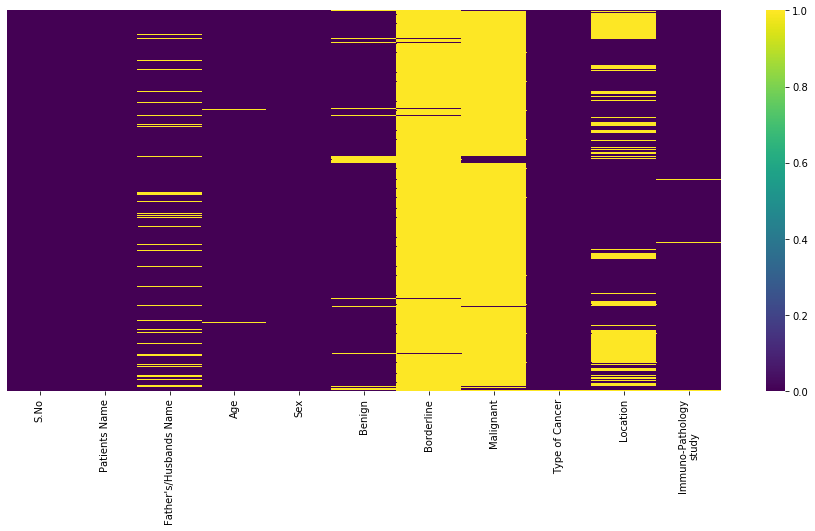

In [4]:
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

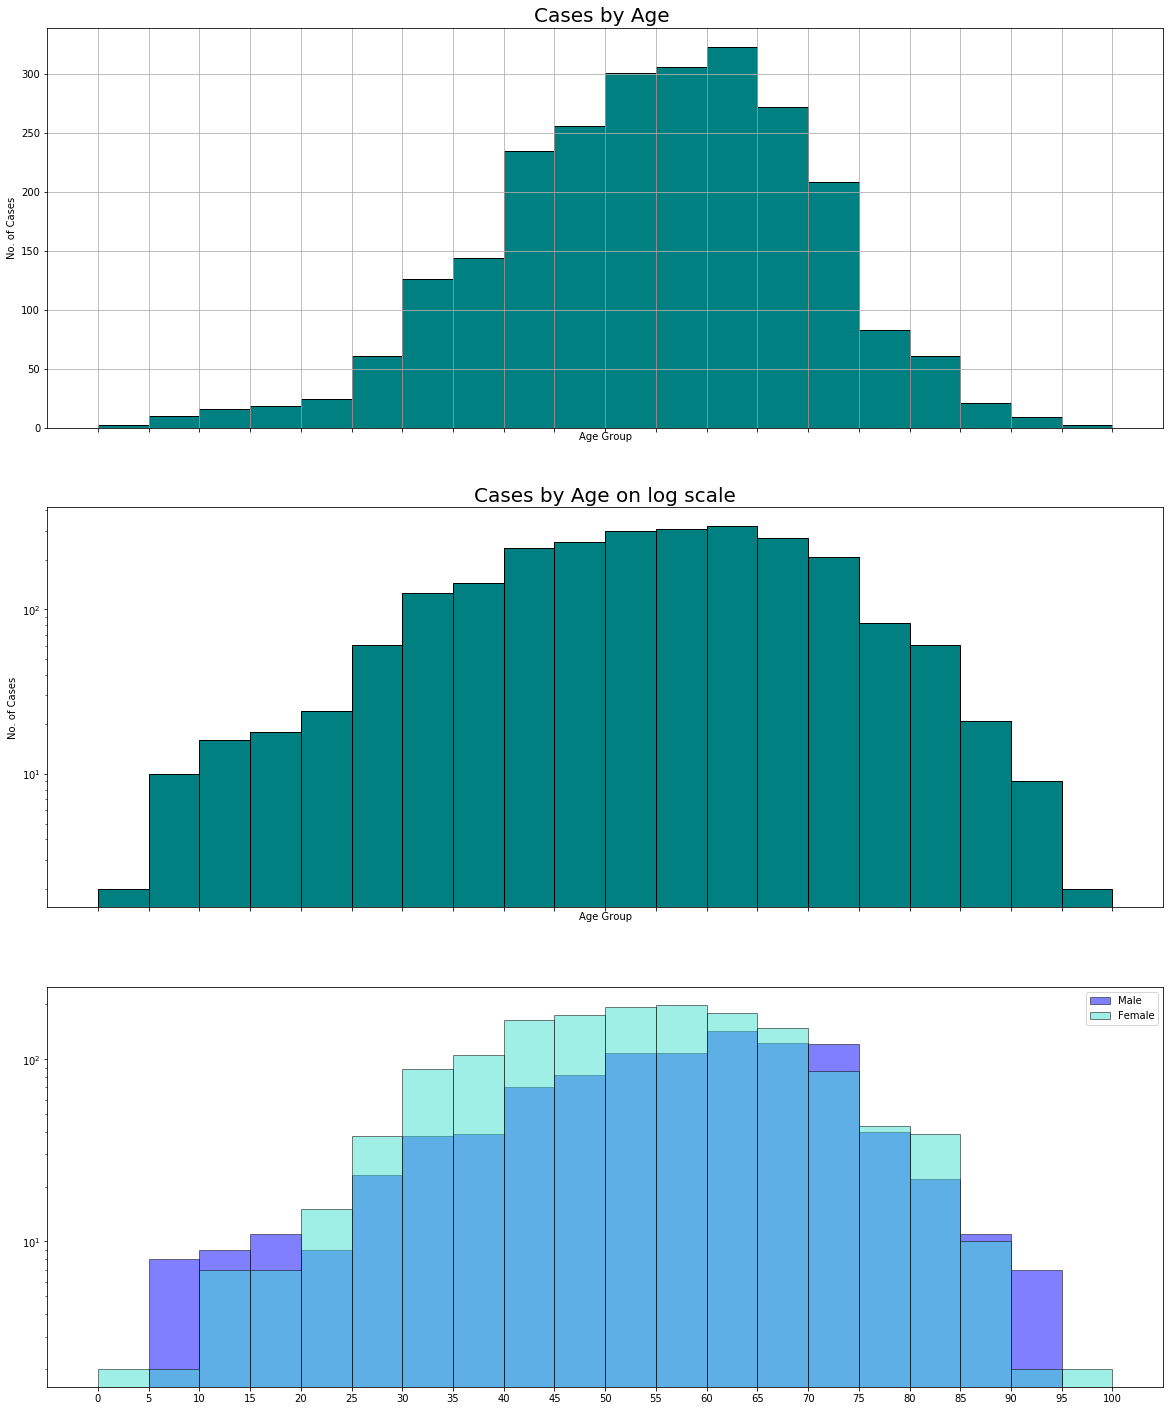

In [5]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(20,25),sharex=True)

bins=np.arange(0,105,5)
ax1.hist(df['Age'],bins=bins, edgecolor='k',color="teal")
ax2.hist(df['Age'],bins=bins, edgecolor='k',log=True,color="teal")


#ax1.set_xticks(ticks=bins, labels= bins)
ax1.set_xlabel("Age Group")
ax1.set_ylabel("No. of Cases")
ax1.set_title("Cases by Age ", Fontsize=20)
ax1.grid(True)

ax2.set_xticks(ticks=bins)
ax2.set_xlabel("Age Group")
ax2.set_ylabel("No. of Cases")
ax2.set_title("Cases by Age on log scale", Fontsize=20)


filt5 = df['Sex']=='Male'
filt6 = df['Sex']=='Female'
male_hist = df.loc[filt5]
female_hist = df.loc[filt6]

ax3.hist(male_hist['Age'],bins=bins, edgecolor='k',log=True,color="blue",label='Male',alpha=0.5)
ax3.hist(female_hist['Age'],bins=bins, edgecolor='k',log=True,color="turquoise",label='Female',alpha=0.5)
plt.legend()



{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c468150>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c479ad0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a1c470c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c481ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c487550>],
 'means': [<matplotlib.lines.Line2D at 0x1a1c479b90>]}

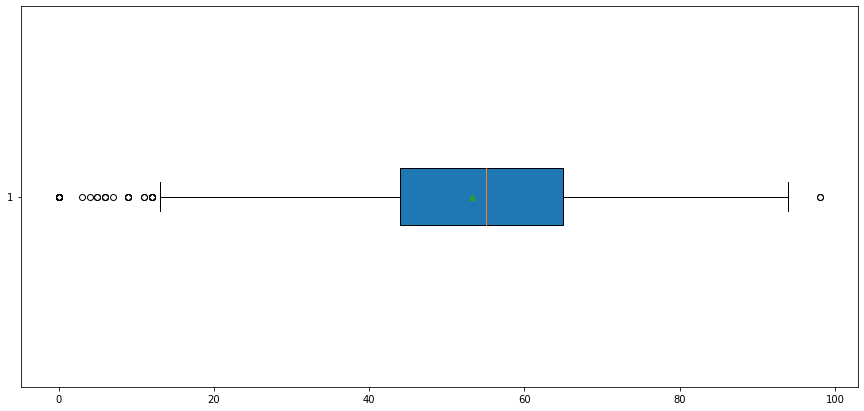

In [6]:
plt.figure(figsize=(15,7))
df['Age'].fillna(0,inplace=True)
a=df['Age'].astype('int')[1:]
plt.boxplot(a,vert = False, patch_artist=True,showmeans=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No                    2493 non-null   int64  
 1   Patients Name           2482 non-null   object 
 2   Father's/Husbands Name  2219 non-null   object 
 3   Age                     2493 non-null   float64
 4   Sex                     2493 non-null   object 
 5   Benign                  2379 non-null   object 
 6   Borderline              41 non-null     object 
 7   Malignant               72 non-null     object 
 8   Type of Cancer          2487 non-null   object 
 9   Location                1758 non-null   object 
 10  Immuno-Pathology
study  2476 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 214.4+ KB


Text(0.5, 1.0, 'Genderwise Cases')

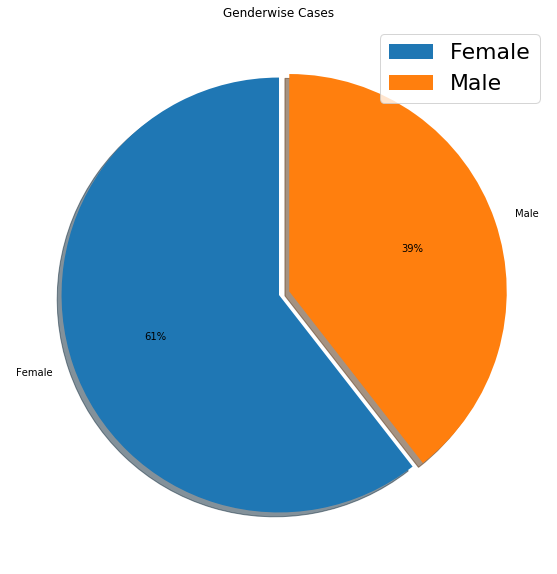

In [8]:
plt.figure(figsize=(10,10))
df['Sex'].value_counts()
plt.pie(df['Sex'].value_counts(),labels=['Female','Male'],shadow=True,explode=[0,0.05],autopct='%1.f%%',startangle=90)
plt.legend(loc='upper right',fontsize=22)
df['Sex'].value_counts()
plt.title("Genderwise Cases")

Text(0.5, 1.0, 'Stage of Cancer Distribution')

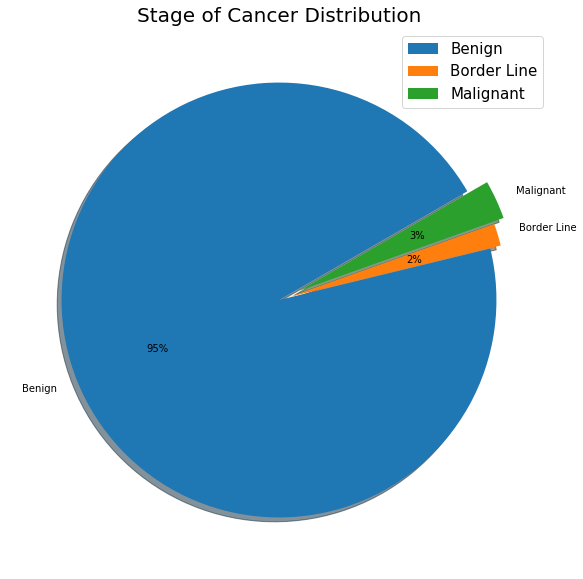

In [9]:
plt.figure(figsize=(10,10))
benign = df['Benign'].count()
borderline =df['Borderline'].count()
malignant = df['Malignant'].count()
plt.pie([benign,borderline,malignant],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
df['Sex'].value_counts()
plt.title("Stage of Cancer Distribution", Fontsize=20)


Text(0.5, 1.0, 'Stage of Cancer Distribution in Male')

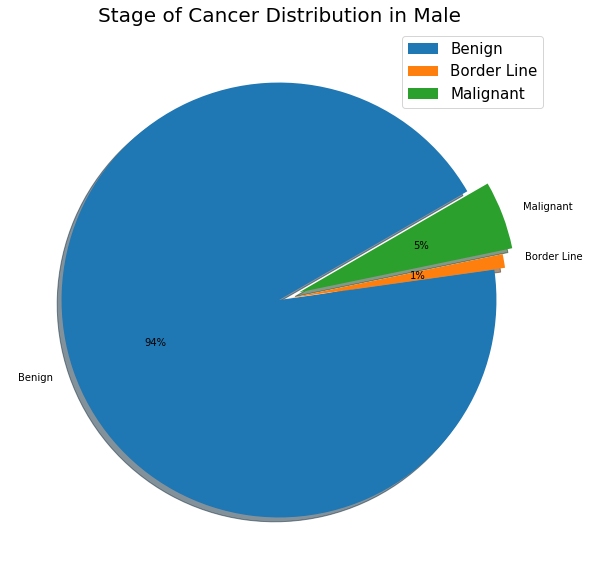

In [10]:
plt.figure(figsize=(10,10))
male_k=df['Sex']=='Male'
benign_m = df.loc[male_k,'Benign'].count()
borderline_m =df.loc[male_k,'Borderline'].count()
malignant_m = df.loc[male_k,'Malignant'].count()
plt.pie([benign_m,borderline_m,malignant_m],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
plt.title("Stage of Cancer Distribution in Male", Fontsize=20)



Text(0.5, 1.0, 'Stage of Cancer Distribution in Female')

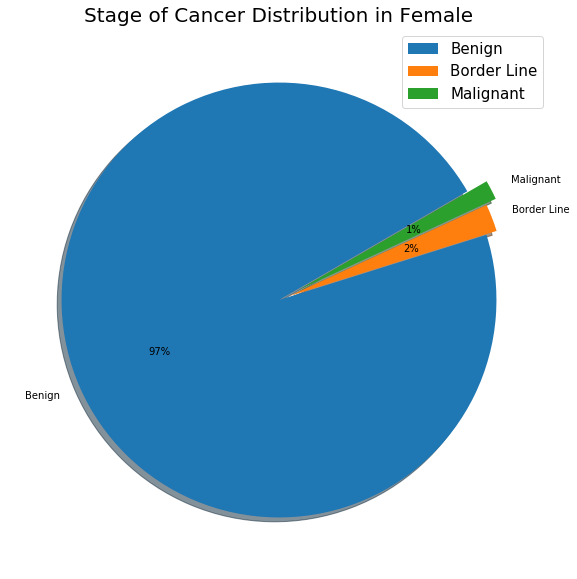

In [26]:
plt.figure(figsize=(10,10))
female_k=df['Sex']=='Female'
benign_f = df.loc[female_k,'Benign'].count()+10
borderline_f =df.loc[female_k,'Borderline'].count()
malignant_f = df.loc[female_k,'Malignant'].count()
plt.pie([benign_f,borderline_f,malignant_f],labels=['Benign','Border Line','Malignant'],shadow=True,explode=[0,0.05,0.1],autopct='%1.f%%',startangle=390)
plt.legend(loc='upper right',fontsize=15)
plt.title("Stage of Cancer Distribution in Female", Fontsize=20)

Text(0.5, 1.0, 'Type of Cancer Share')

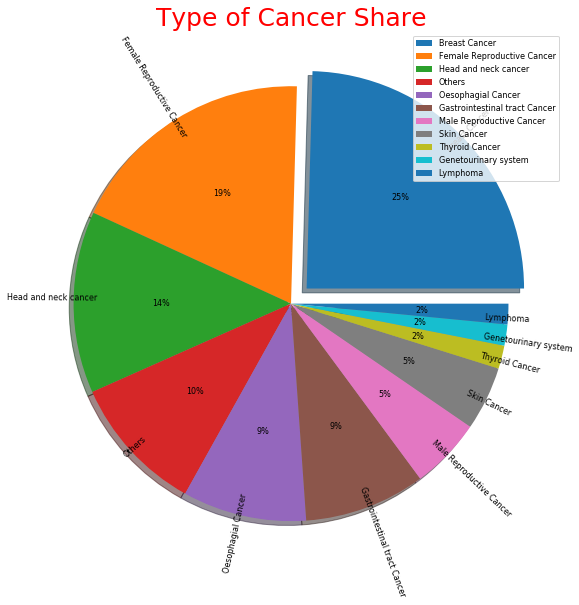

In [22]:
# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
type_of_cancer=df['Type of Cancer'].value_counts().sort_values()
type_of_cancer
others=0
for item in type_of_cancer:
    if item<27:
        others= item +others
type(others)
obj = pd.Series(others)
obj.index=["Others"]
type_of_cancer = type_of_cancer.append(pd.Series(obj))
type_of_cancer_top = type_of_cancer.sort_values(ascending=False).nlargest(11)
type_of_cancer_top
exp= np.zeros(11)
exp[0]=0.1
type_of_cancer_top.plot.pie(figsize=(10,10),autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,fontsize=8,labeldistance=0.89)
plt.legend(fontsize=8,loc='best')
plt.ylabel("")
plt.title('Type of Cancer Share',Fontsize=25,color='r')



Text(0.5, 1.0, 'Other Type of Cancer Share')

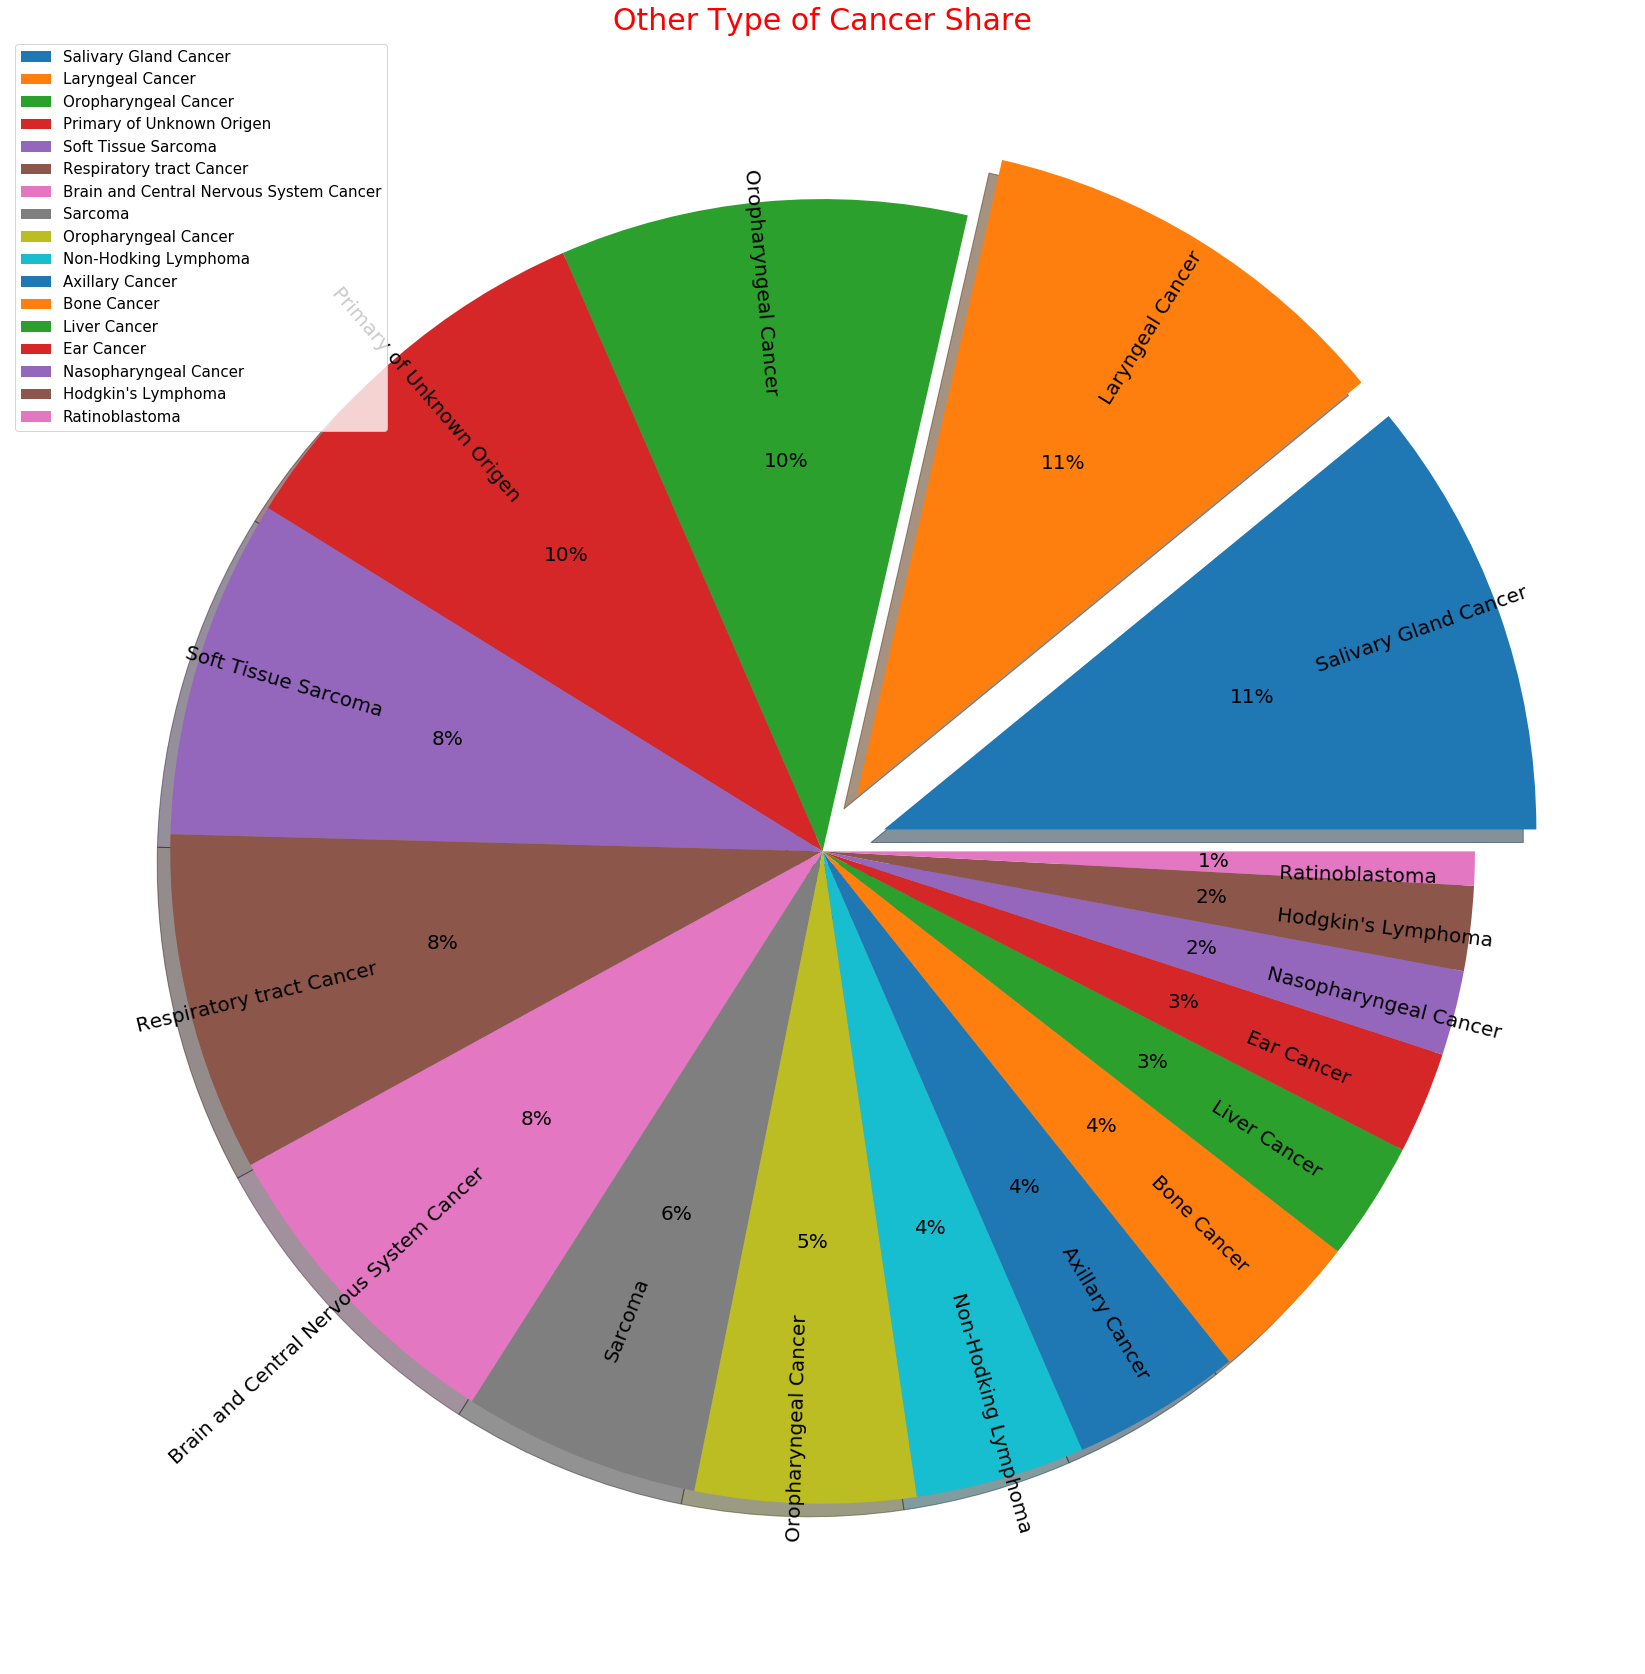

In [29]:
oth = type_of_cancer.sort_values(ascending=False)[11:28]
exp= np.zeros(17)
exp[0]=0.1
exp[1]=0.1
oth.plot.pie(figsize=(30,30),autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,fontsize=20,labeldistance=0.7)
plt.legend(fontsize=15,loc='best')
plt.ylabel("")
plt.title('Other Type of Cancer Share',Fontsize=30,color='r')

Text(0.5, 1.0, 'Instances of cancer in Female')

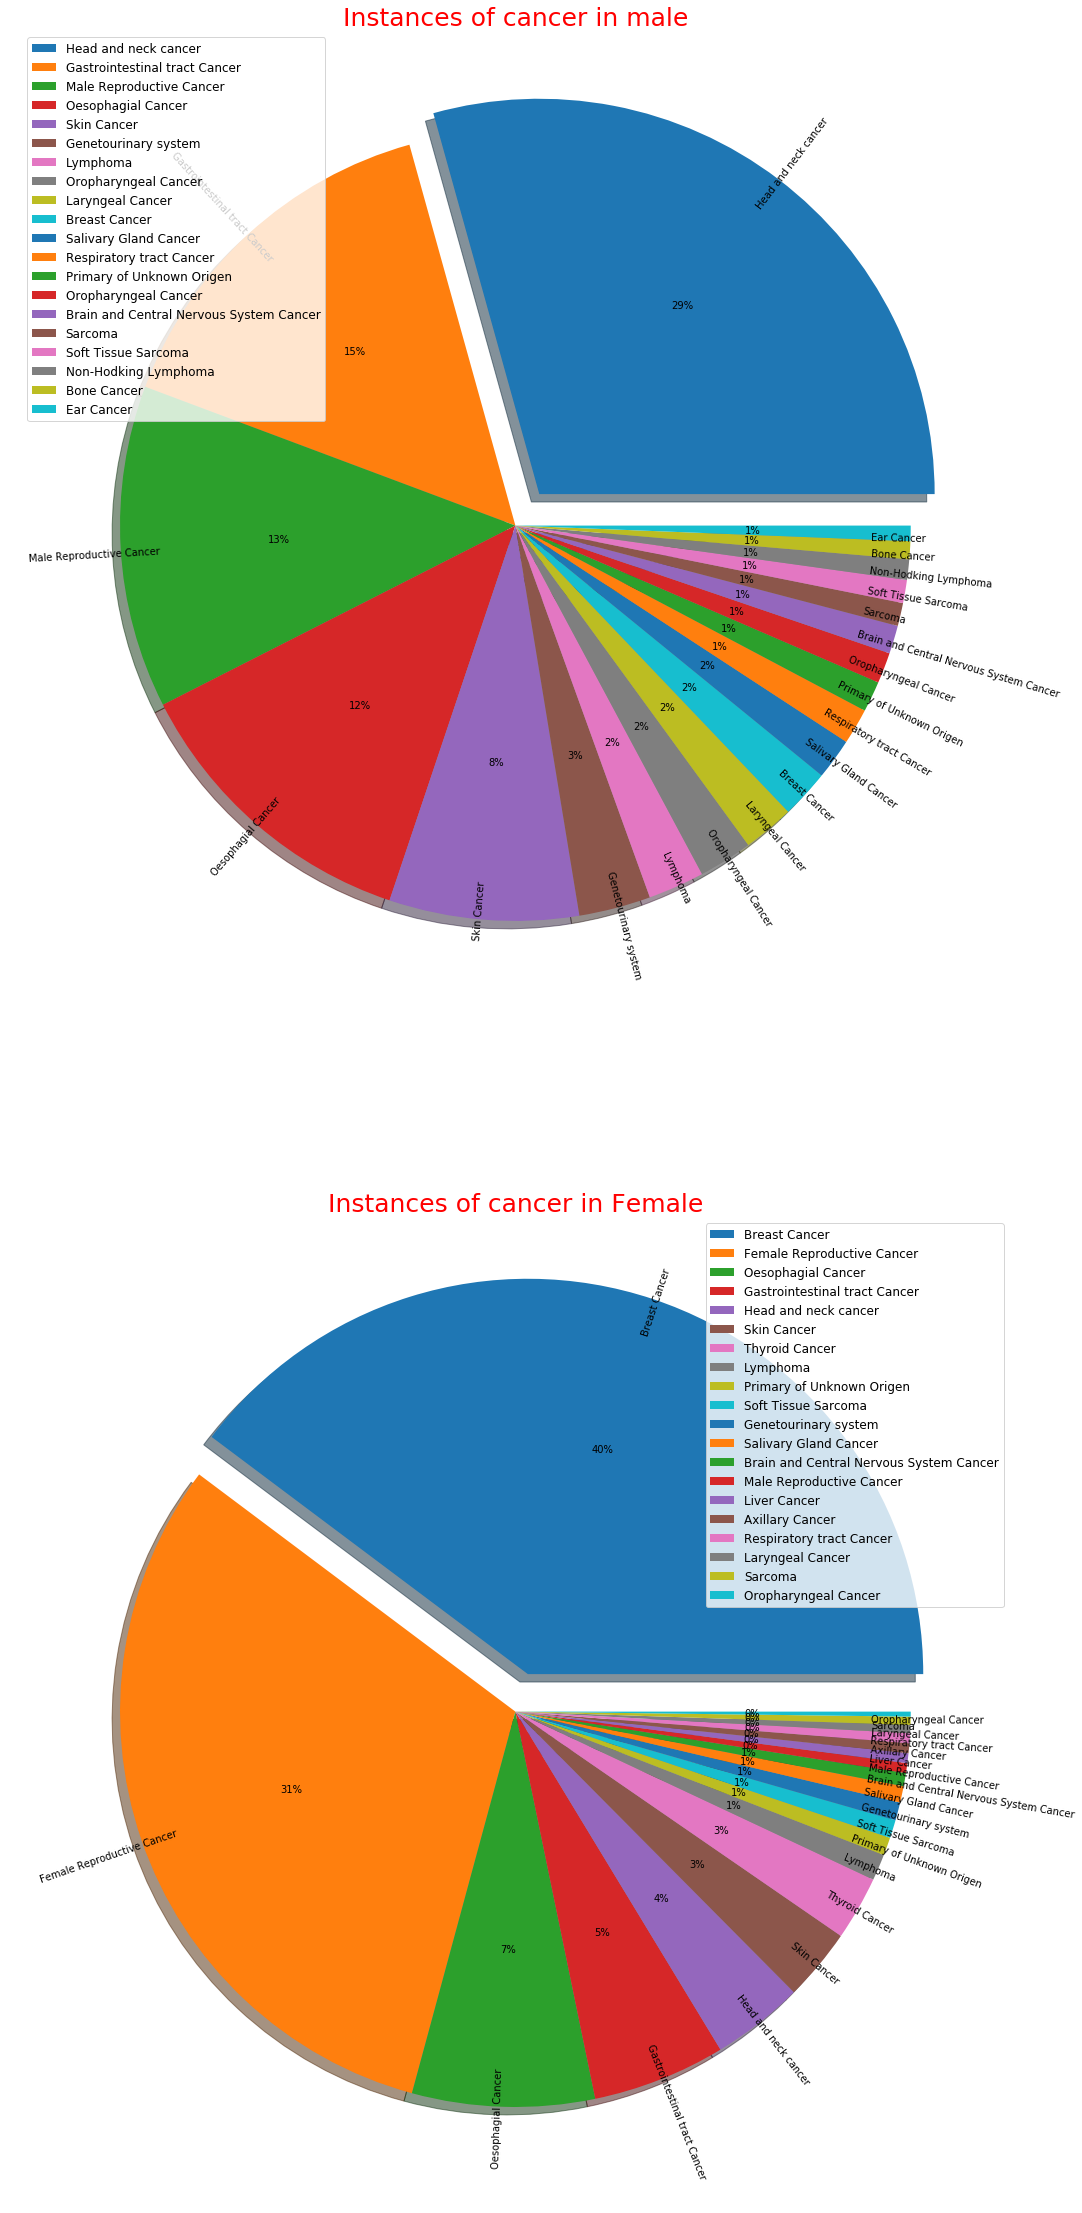

In [28]:
fig,(ax2,ax3)=plt.subplots(nrows=2,ncols=1,figsize=(40,40))
filt3=df['Sex']=='Male'
male=df.loc[filt3,'Type of Cancer'].value_counts().sort_values().nlargest(20)
exp= np.zeros(20)
exp[0]=0.1
ax2.pie( male,autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,labeldistance=0.9,labels=male.index.values)

filt4=df['Sex']=='Female'
female=df.loc[filt4,'Type of Cancer'].value_counts().sort_values().nlargest(20)
exp= np.zeros(20)
exp[0]=0.1
ax3.pie(female,autopct='%1.f%%',explode=exp,shadow=True,rotatelabels = 270,labeldistance=0.9,labels=female.index.values)

ax2.legend(fontsize=12,loc='upper left')
ax2.set_ylabel(" ")
ax2.set_title('Instances of cancer in male',Fontsize=25,color='r')

ax3.legend(female.index.values,fontsize=12,loc='best')
ax3.set_ylabel(" ")
ax3.set_title('Instances of cancer in Female',Fontsize=25,color='r')

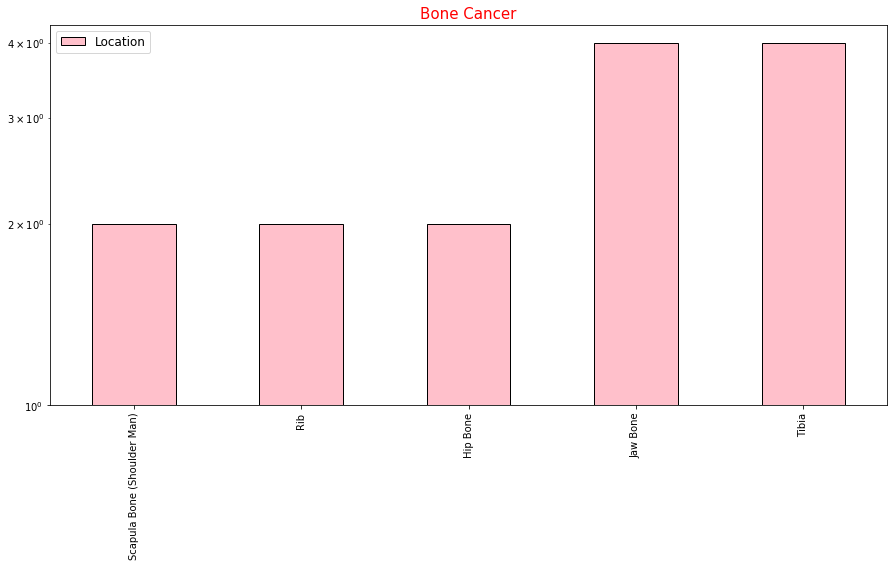

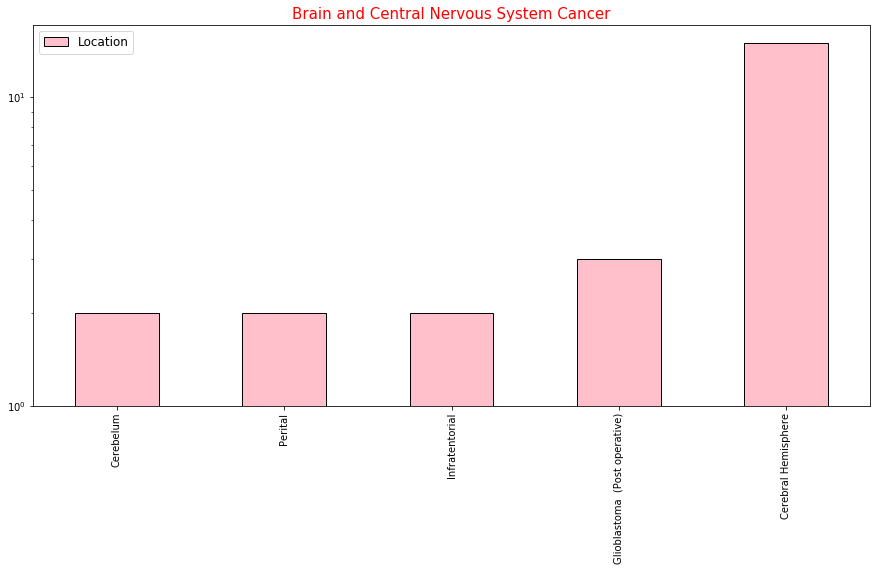

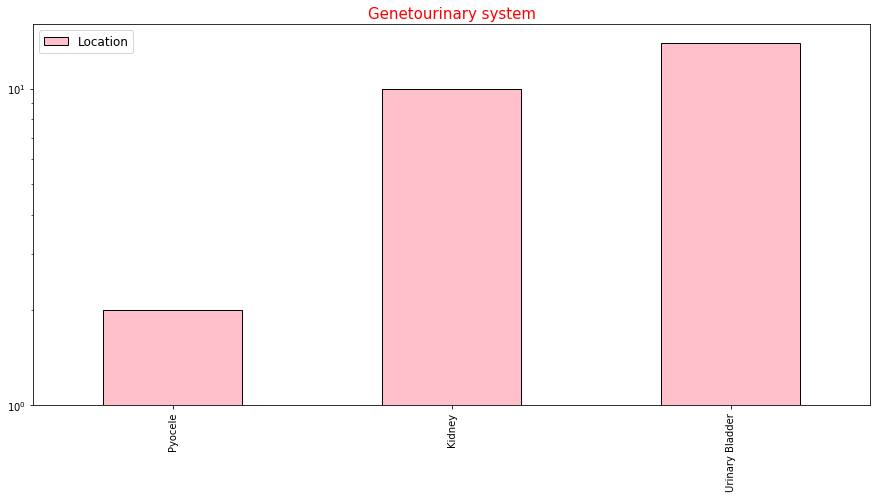

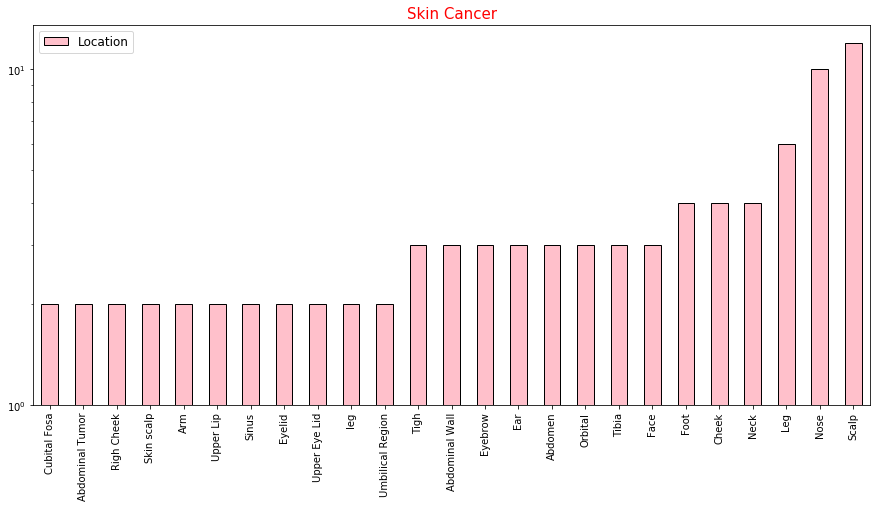

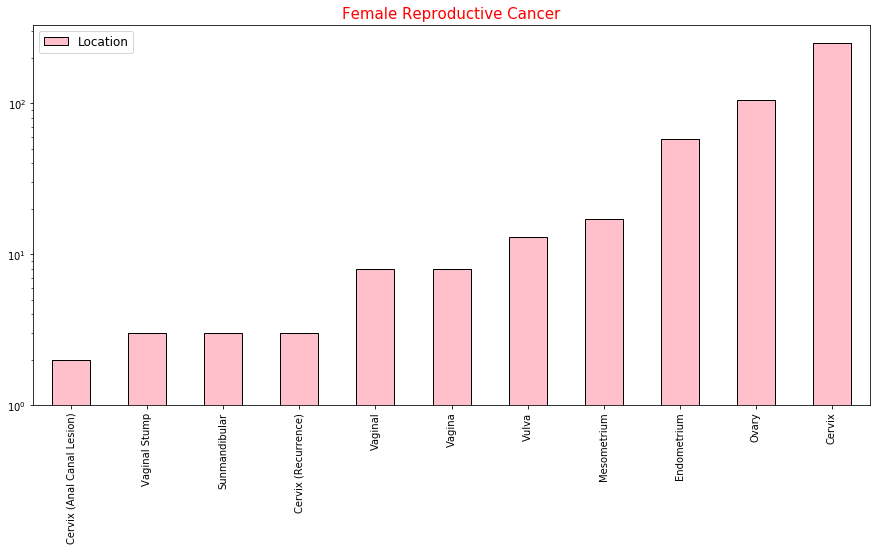

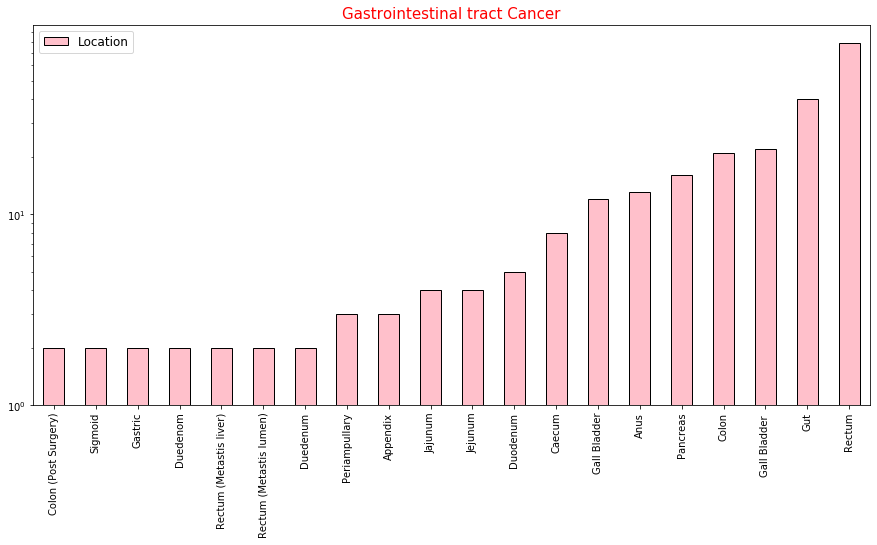

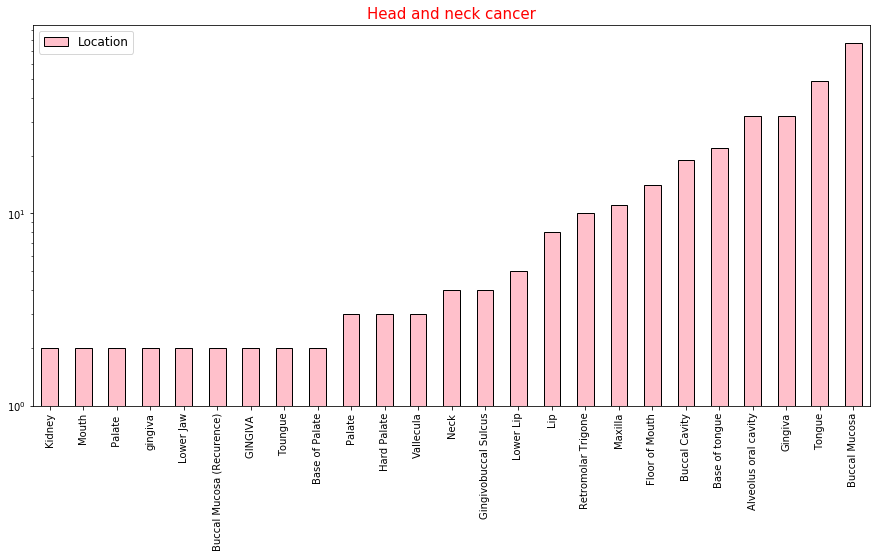

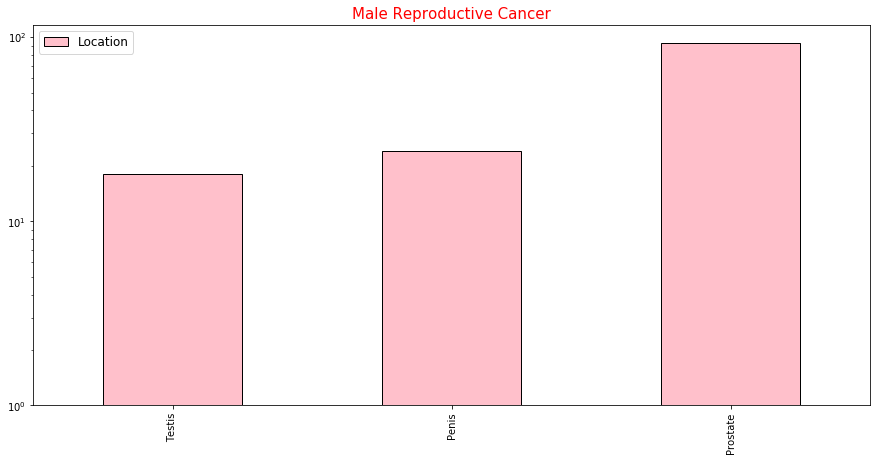

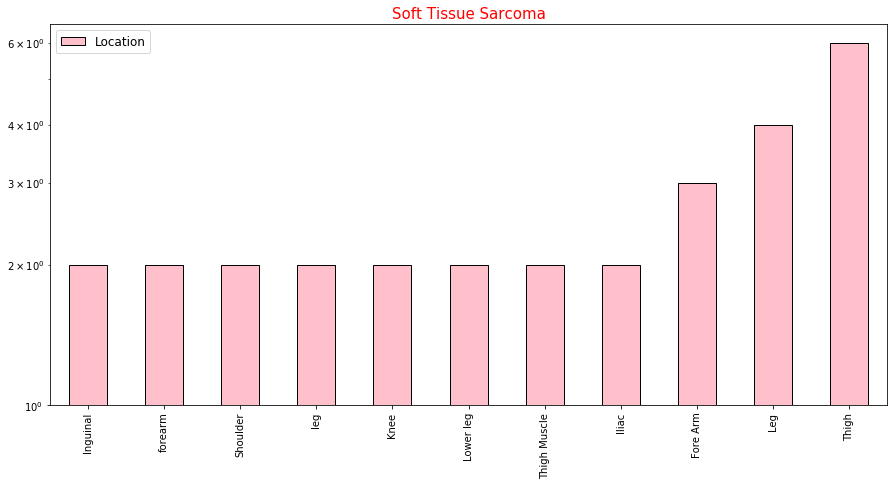

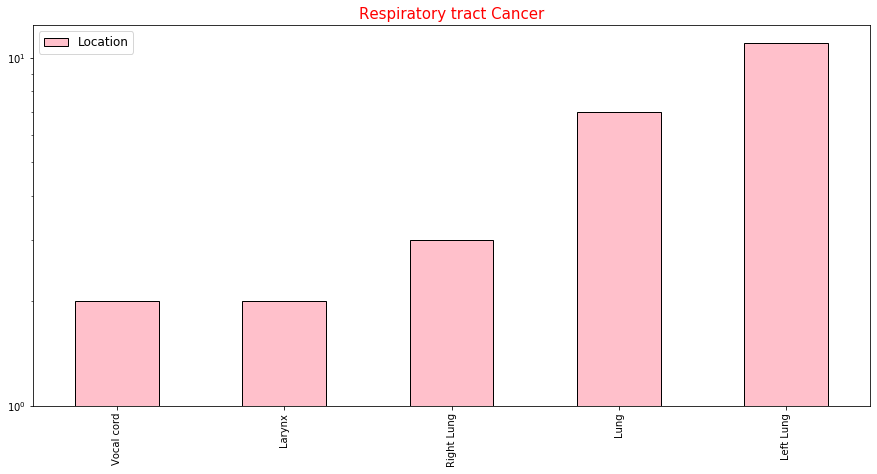

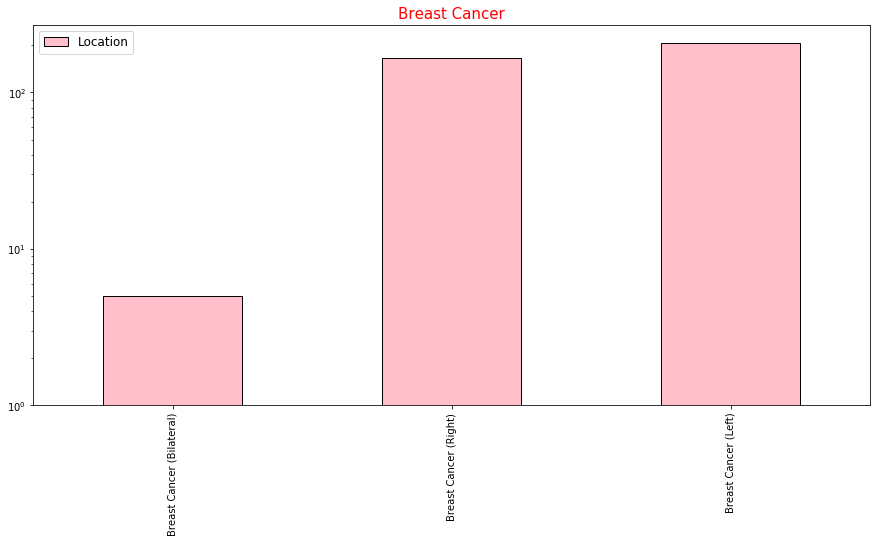

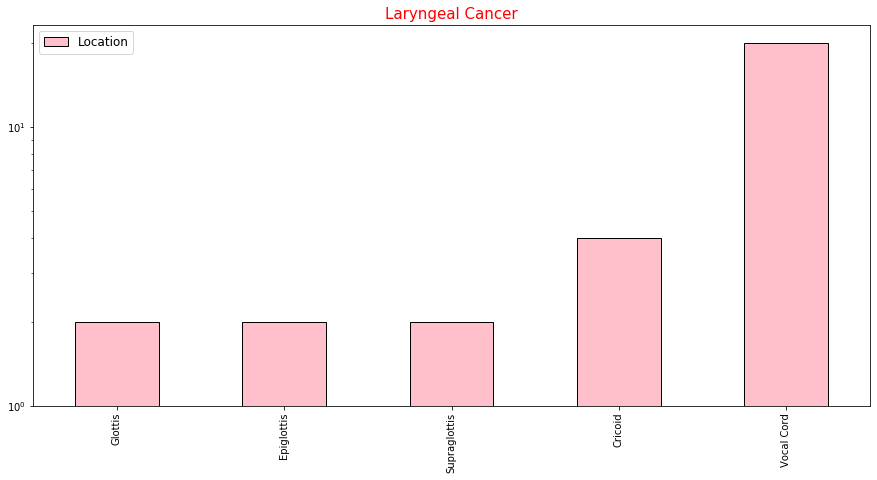

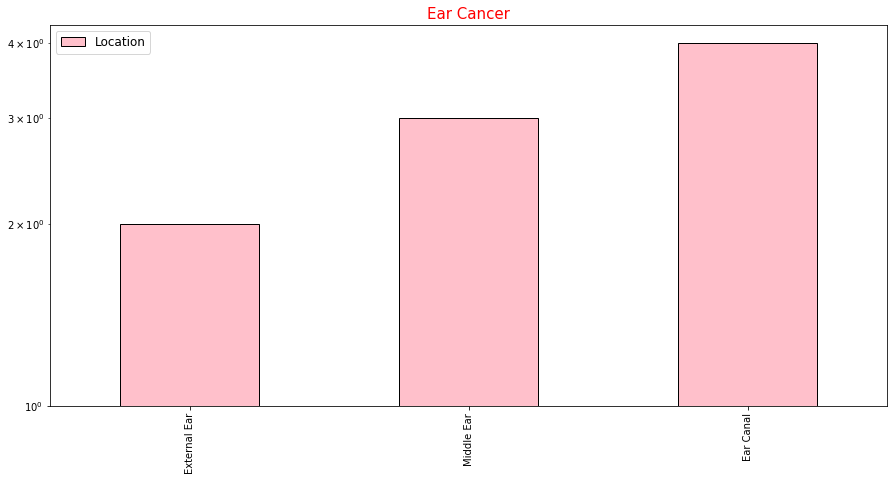

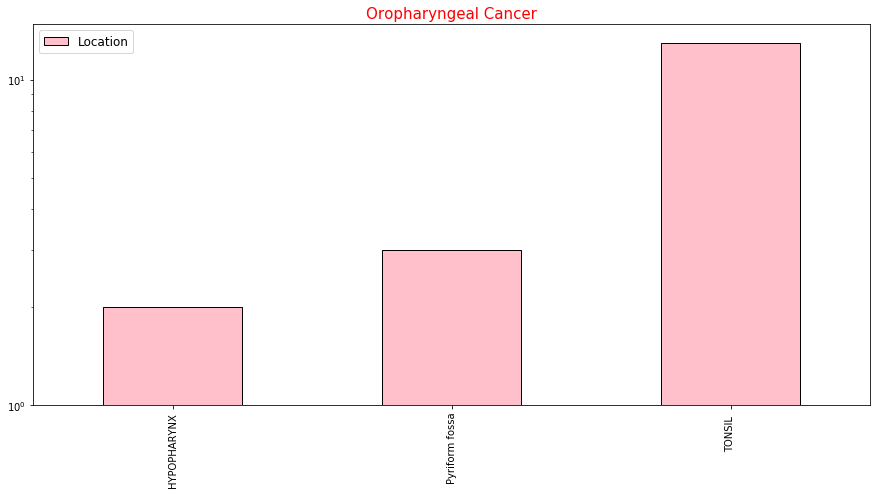

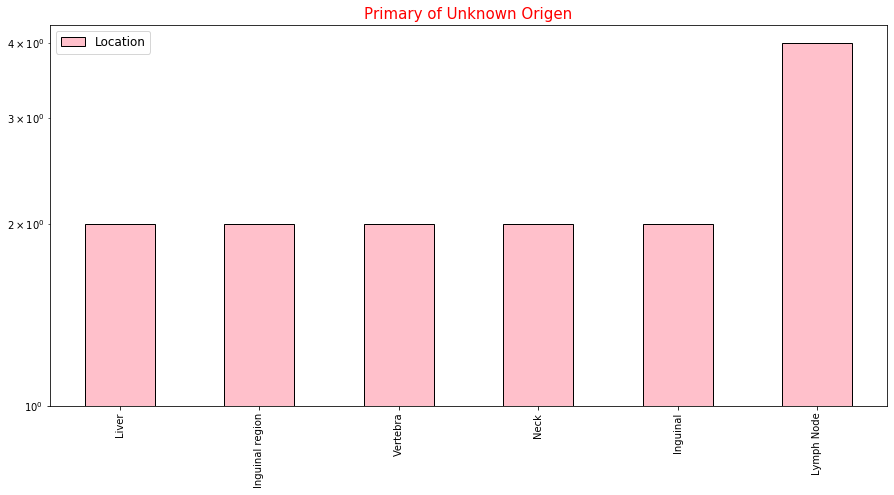

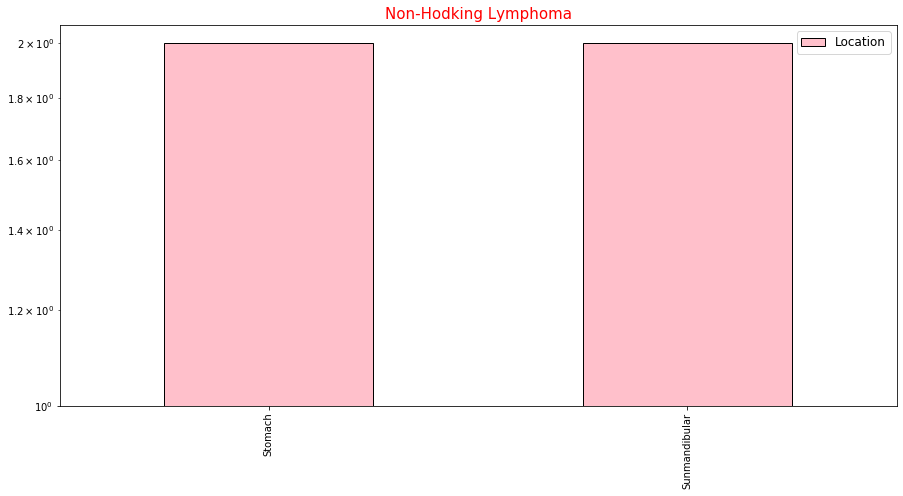

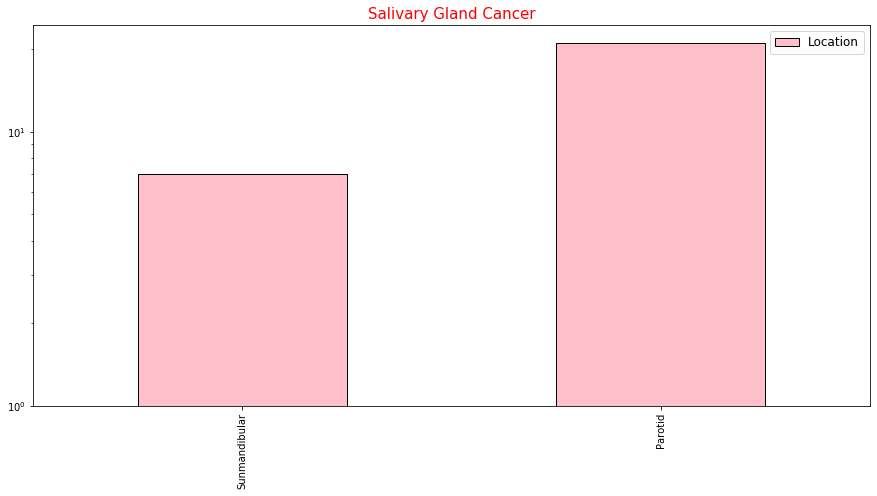

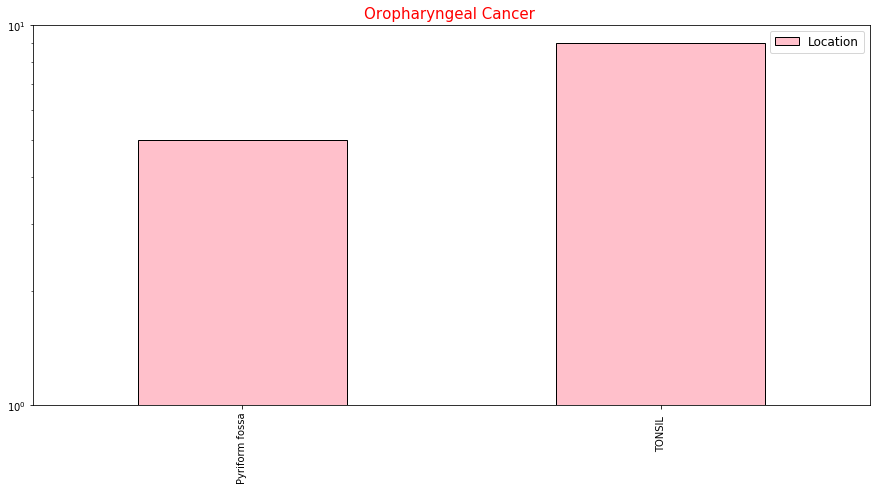

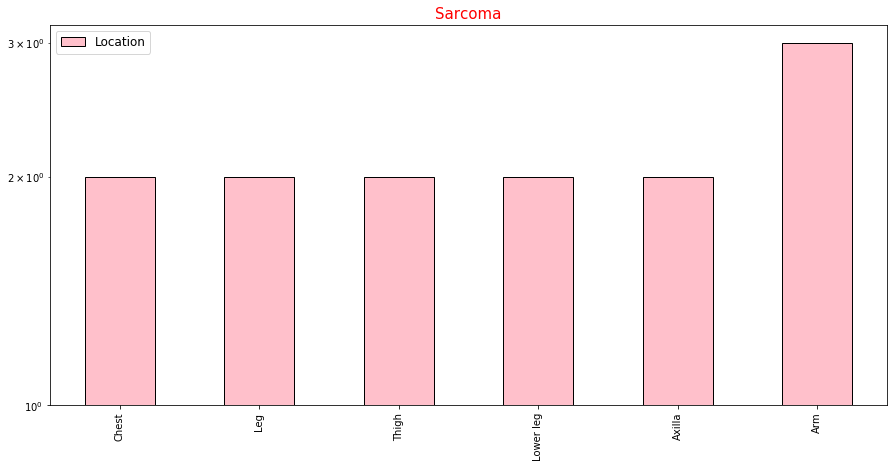

In [15]:
for item in df['Type of Cancer'].unique():
    c=['cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r','pink','maroon','cyan','torquoise','grey','c','r']
    filt = df['Type of Cancer']==item
    at = df.loc[filt,'Location'].value_counts().nlargest(25).sort_values()
    #print(at)
    if len(at)>1:
        plt.figure(figsize=(15,7))
        at.plot.bar(subplots=True,log=True,edgecolor='black',color='pink')
        plt.legend(fontsize=12)
        plt.title(item,fontsize=15,color='r')
        
plt.show()